# Machine Learning

### Crima Rate Prediction for Boston City

Applying 3 models for better prediction:
- OLS Regression Model
- Ridge Regression Model
- Lasso Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns


In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
bos=pd.DataFrame(boston.data,columns=boston.feature_names)


In [5]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### OLS Model

In [6]:
from statsmodels.formula.api import ols


In [7]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [8]:
bos_mod=ols(formula='CRIM ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',
            data=bos).fit()
bos_mod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     32.55
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           4.84e-55
Time:                        03:07:10   Log-Likelihood:                -1658.8
No. Observations:                 506   AIC:                             3344.
Df Residuals:                     493   BIC:                             3398.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9967      6.979      1.432      0.153      -3.716      23.709
ZN             0.0364      0.019      1.943      0.053      -0.000       0.073
INDUS         -0.0694      0.084     -0.825      0.410      -0.235       0.096
CHAS          -1.3117      1.179     -1.112      0.267      -3.629       1.005
NOX           -6.9288      5.225     -1.326      0.185     -17.195       3.338
RM            -0.3348      0.573     -0.585      0.559      -1.460       0.790
AGE            0.0013      0.018      0.074      0.941      -0.034       0.037
DIS           -0.7089      0.271     -2.612      0.009      -1.242      -0.176
RAD            0.5389      0.088      6.151      0.000       0.367       0.711
TAX           -0.0014      0.005     -0.263      0.793      -0.011       0.009
PTRATIO       -0.0834      0.179     -0.465      0.642      -0.436       0.269
B             -0.0096      0.004     -2.625      0.009      -0.017      -0.002
LSTAT          0.2356      0.069      3.431      0.001       0.101       0.371
==============================================================================
Omnibus:                      685.174   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97204.794
Skew:                           6.921   Prob(JB):                         0.00
Kurtosis:                      69.475   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
bos.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [10]:
bos_rig   = bos.copy()
bos_rig_x = bos_rig.drop(['CRIM'], axis =1)
bos_rig_y = bos_rig['CRIM']
bos_rig_x.head()



,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(bos_rig_x, bos_rig_y,test_size=0.3,random_state=5)
print(X_train.shape,X_test.shape)



(354, 12) (152, 12)


# Ridge Model

In [13]:
from sklearn.linear_model import Ridge

In [14]:
Ridge_bos = Ridge(alpha=0.65,normalize=True)
Ridge_bos.fit(X_train, y_train)
rig_bos_pred =Ridge_bos.predict(X_test)

In [15]:
ols_bos = Ridge(alpha=0)
ols_bos.fit(X_train, y_train)
ols_bos_pred = ols_bos.predict(X_test)

In [16]:
np.power(y_test-rig_bos_pred,2).sum()

8267.92095388623

In [17]:
np.power(y_test-ols_bos_pred,2).sum()

8023.573649349983

# Lasso Model

In [18]:
from sklearn.linear_model import Lasso

ls_bos = Lasso(alpha=0.1)
ls_bos.fit(bos_rig_x, bos_rig_y)
ls_bos_pred =ls_bos.predict(X_test)



In [19]:
np.power(y_test-ls_bos_pred,2).sum()


6826.34482011119

### for training and test set on OLS


In [20]:
print("OLD Regression on Test:", "    ", ols_bos.score(X_test,y_test),
      "\nOLS Regression on Training", " ",ols_bos.score(X_train,y_train))

OLD Regression on Test:      0.39545820108420127 
OLS Regression on Training   0.4348770075654609


### for training and test set on Ridge


In [21]:
print("Ridge Regression on Test:", "     ", Ridge_bos.score(X_test,y_test),
      "\nRidge Regression on Training:", " ", Ridge_bos.score(X_train,y_train))


Ridge Regression on Test:       0.3770476815949787 
Ridge Regression on Training:   0.3899708588577222


### for training and test set on Lasso



In [22]:
print("Lasso Regression on Test:", "    ", ls_bos.score(X_test,y_test),
      "\nLasso Regression on Training", " ",ls_bos.score(X_train,y_train))


Lasso Regression on Test:      0.4856642491336899 
Lasso Regression on Training   0.41105741298256615


### Analysis: we notice that the training and test set Ridge has lower score

(-6, 0.59)

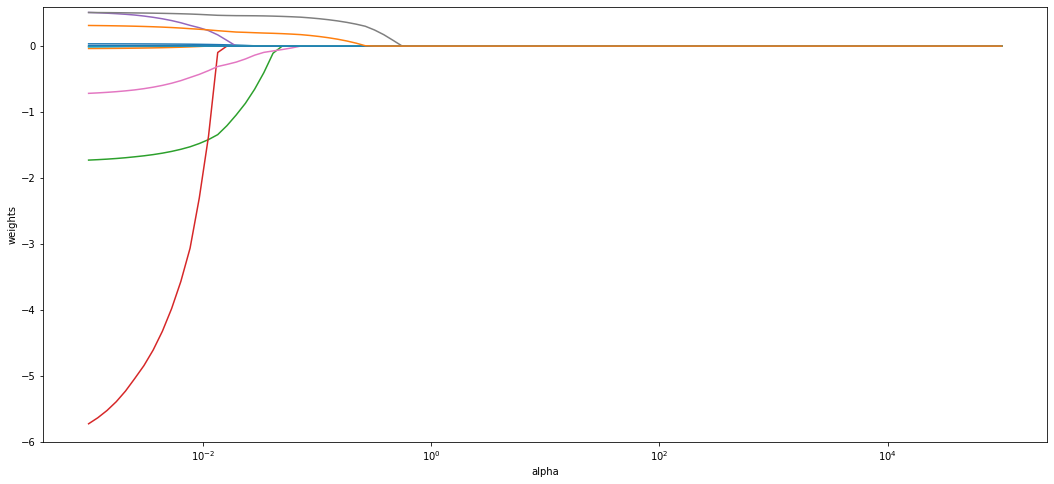

In [23]:
alphas = 10**np.linspace(5,-3,100)*0.5


coefs = []

for a in alphas:
    ls_bos=Lasso(alpha=a, max_iter = 10000, normalize = True)
    ls_bos.fit(X_train, y_train)
    coefs.append(ls_bos.coef_)

plt.figure(figsize=(18, 8))    
ax = plt.gca()

ax.plot(alphas*2, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.ylim(-6,0.59)


In [25]:
from sklearn.metrics import mean_squared_error

print("OLS Prediction   ", mean_squared_error(y_test,ols_bos_pred),
     "\nRidge Predcition ",mean_squared_error(y_test,rig_bos_pred),
      "\nLasso Prediction ",mean_squared_error(y_test,ls_bos_pred)
     )

OLS Prediction    52.78666874572357 
Ridge Predcition  54.3942168018831 
Lasso Prediction  44.9101632902052


### analysis: we see that Lasso MSE is doing better compared to other models